# Analyse Titanic.csv

In [14]:
import sklearn
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_bar, geom_histogram, labs, theme_minimal

In [15]:
from pathlib import Path
repo_root = Path.cwd().parents[1]
csv_path = repo_root / "data" / "titanic.csv"
titanic_df = pd.read_csv(csv_path)
titanic_df.shape

(891, 12)

In [17]:
# Erste Übersicht
display(titanic_df.head())
print('--- describe ---')
display(titanic_df.describe(include='all'))
# Fehlende Werte
print('--- missing values per column ---')
print(titanic_df.isnull().sum())
# Häufigkeiten wichtiger Spalten
print('--- value counts: Survived ---')
print(titanic_df['Survived'].value_counts(dropna=False))
print('--- value counts: Pclass ---')
print(titanic_df['Pclass'].value_counts(dropna=False))
print('--- value counts: Sex ---')
print(titanic_df['Sex'].value_counts(dropna=False))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


--- describe ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


--- missing values per column ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--- value counts: Survived ---
Survived
0    549
1    342
Name: count, dtype: int64
--- value counts: Pclass ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
--- value counts: Sex ---
Sex
male      577
female    314
Name: count, dtype: int64


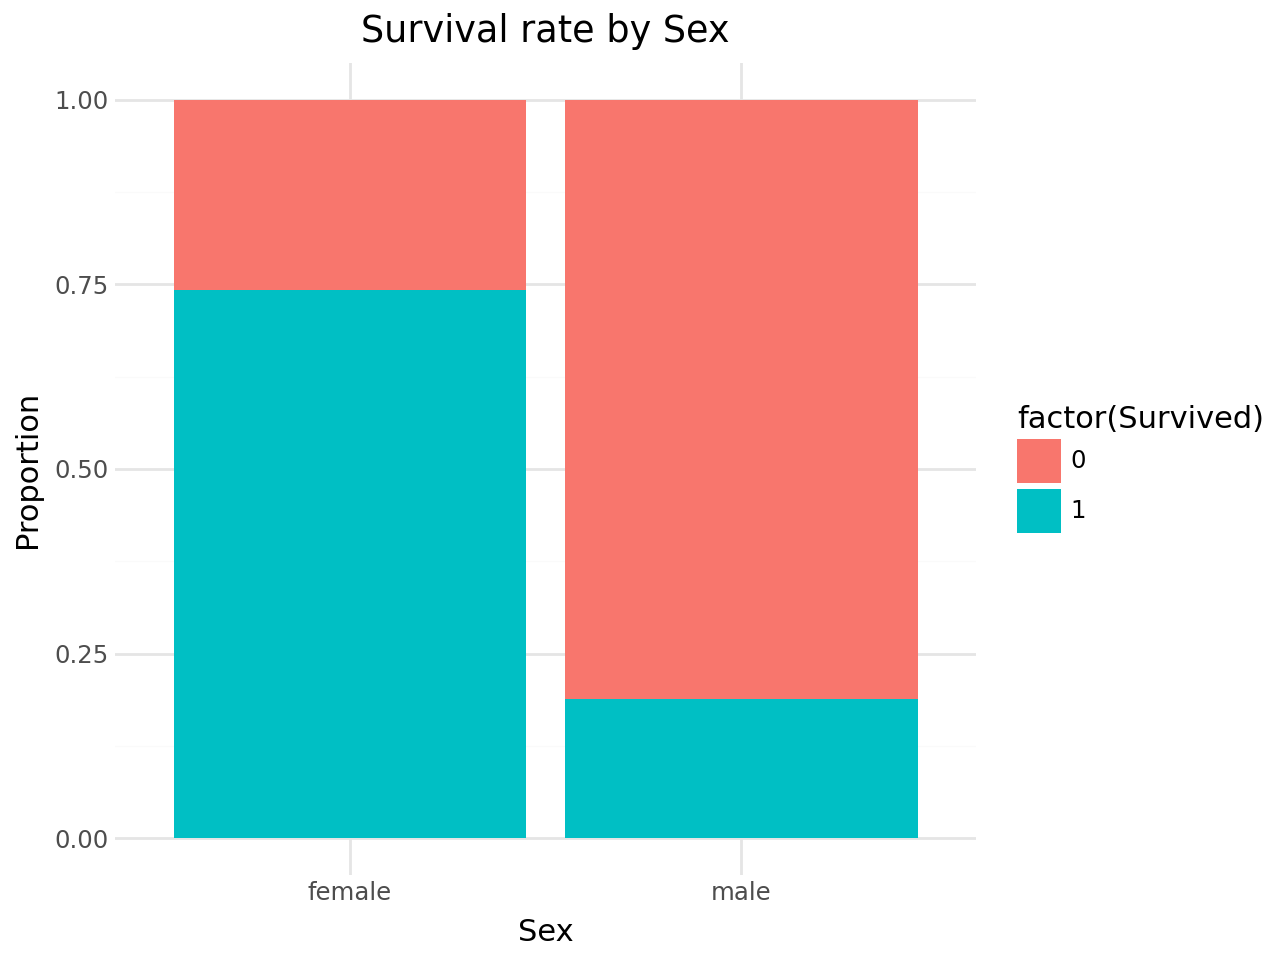

In [20]:
# Einfache Plots mit plotnine
# 1) Überlebensrate nach Geschlecht (proportional)
plot1 = (ggplot(titanic_df) + aes(x='Sex', fill='factor(Survived)') + geom_bar(position='fill') + labs(y='Proportion', title='Survival rate by Sex') + theme_minimal())
plot1

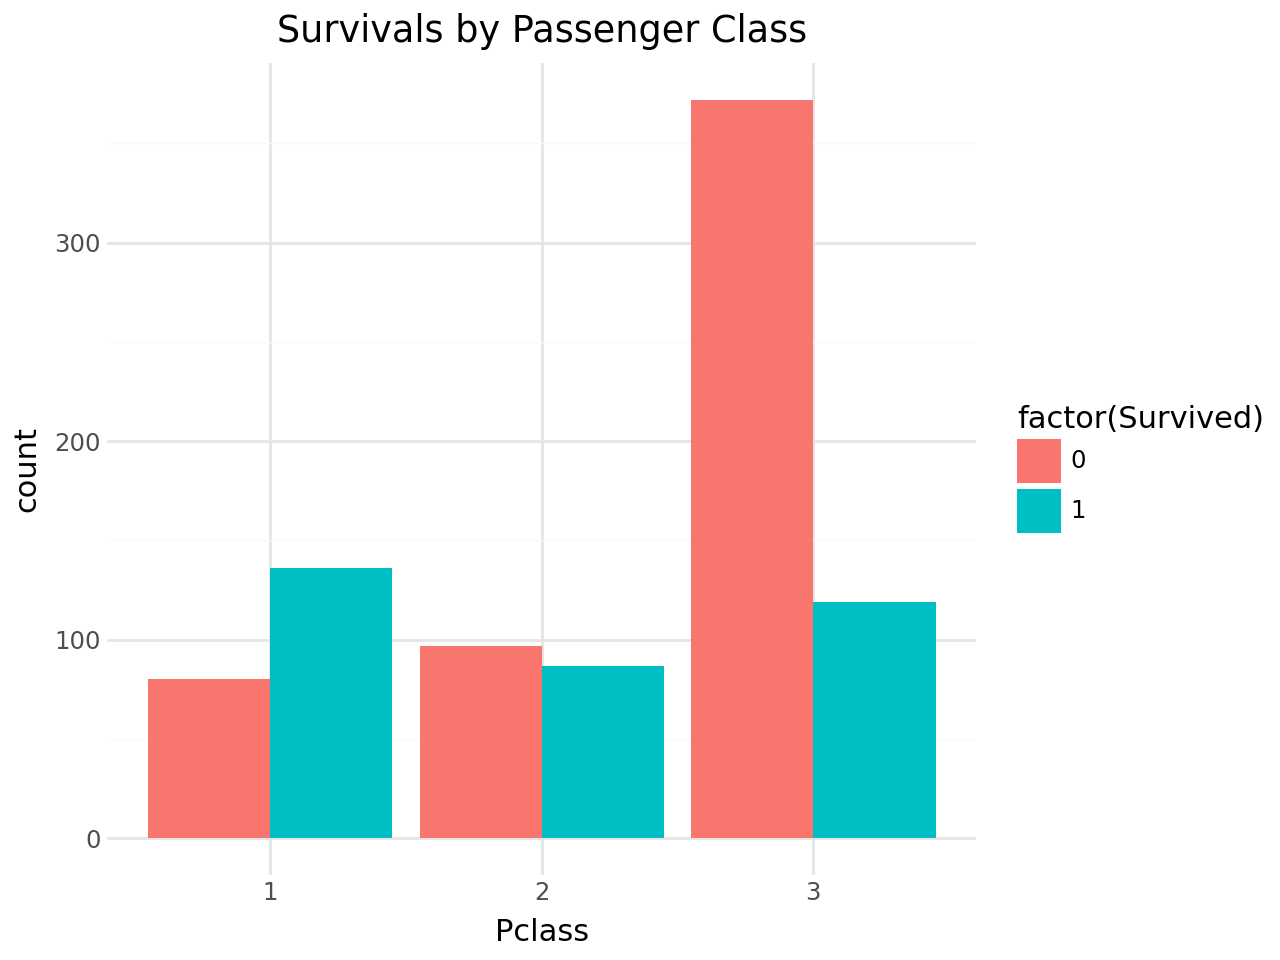

In [21]:
# 2) Überlebensanzahl nach Klasse
plot2 = (ggplot(titanic_df) + aes(x='factor(Pclass)', fill='factor(Survived)') + geom_bar(position='dodge') + labs(x='Pclass', title='Survivals by Passenger Class') + theme_minimal())
plot2

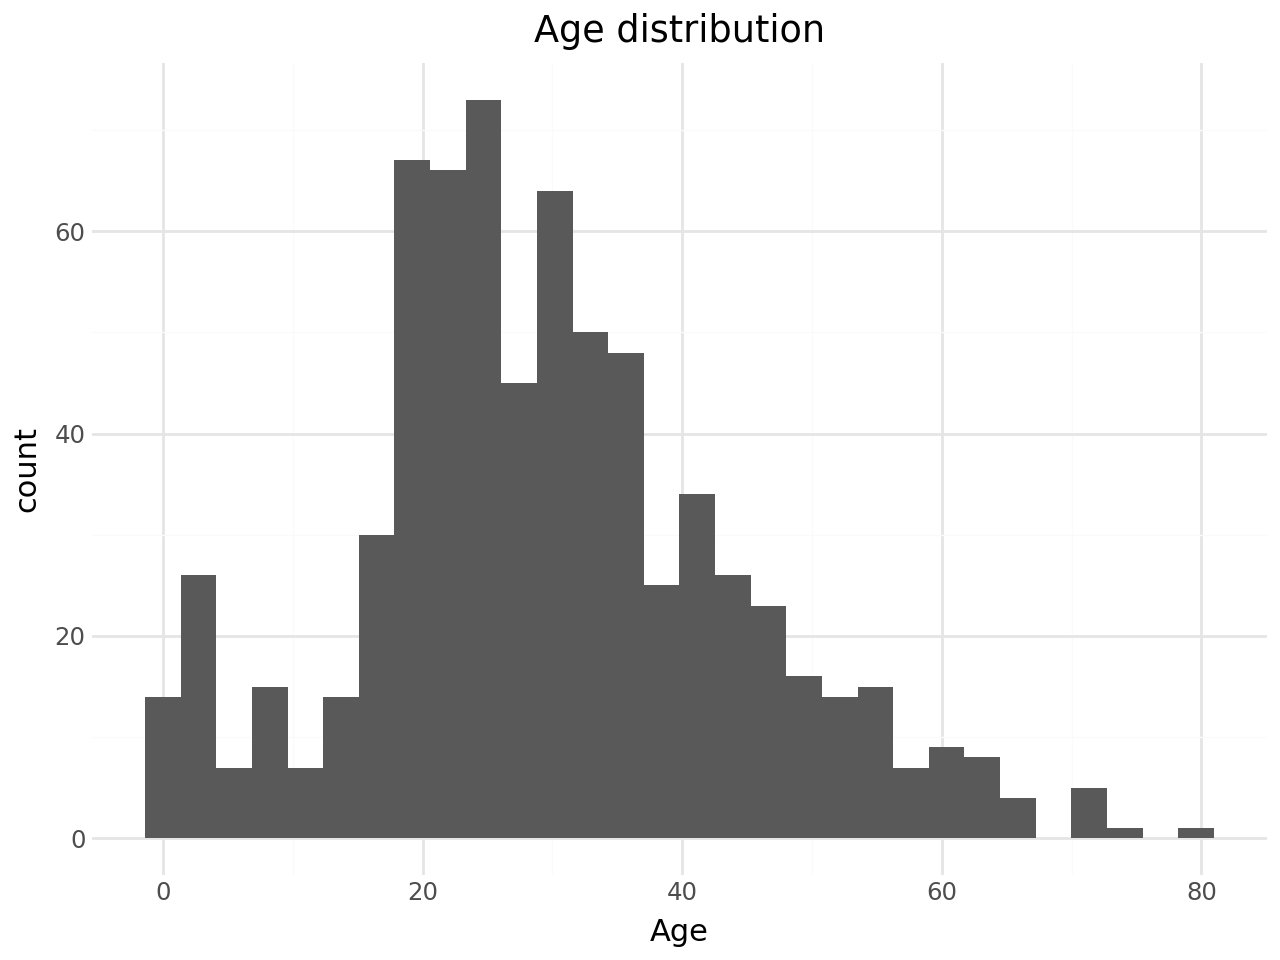

In [22]:
# 3) Alter-Verteilung (Histogram)
plot3 = (ggplot(titanic_df.dropna(subset=['Age'])) + aes(x='Age') + geom_histogram(bins=30) + labs(title='Age distribution') + theme_minimal())
plot3

# Kurzbericht — Titanic-Datenanalyse
Dieser kurze Bericht fasst die wichtigsten Beobachtungen aus der Explorativen Datenanalyse zusammen. Bitte führe vorher alle Code-Zellen aus, damit Platzhalterwerte (z. B. Anzahl N) durch die tatsächlichen Zahlen ersetzt werden können.

**Datenquelle & Form**
- Dataset: `data/titanic.csv`.
- Form: `N` Zeilen, `M` Spalten (bitte nach Ausführung die genauen Werte eintragen).

**Fehlende Werte**
- Auffällig fehlend: `Age` (mehrere Einträge) und `Cabin` (stark lückenhaft).
- Empfehlung: `Age` mit Median/Modell imputieren; `Cabin` entweder kategorisieren (z.B. Deck) oder weglassen, da viele Werte fehlen.


**Wesentliche Beobachtungen**
- Gesamte Überlebensrate: `X` (bitte aus der Summary-Zelle übernehmen).
- Geschlecht: Frauen haben deutlich höhere Überlebensraten als Männer. (typischer Befund: weibliche Passagiere überleben häufiger)
- Passagierklasse: Passagiere der 1. Klasse hatten eine deutlich höhere Überlebenswahrscheinlichkeit als Passagiere der 3. Klasse.
- Alter: Kinder und jüngere Erwachsene zeigen andere Überlebensmuster; Altersverteilung ist recht breit (Histogramm anzeigen).
- Korrelationen: Numerische Features (z. B. `Fare`, `Pclass`, `Age`) zeigen erwartbare Zusammenhänge mit `Survived` — `Pclass` und `Sex` sind besonders informativ.

**Visualisierungen (empfohlen)**
- Proportionales Balkendiagramm: Überlebensrate nach `Sex` (Anteil überlebt / gestorben).
- Gestapelte/nebeneinander Balken: Überleben nach `Pclass` und `Sex`.
- Histogramm / KDE: Altersverteilung, ggf. getrennt nach Überlebensstatus.
- Heatmap oder Korrelationsmatrix für numerische Variablen.

**Schlussfolgerungen & nächste Schritte**
- Datensäuberung: fehlende `Age` behandeln, `Cabin` beurteilen, `Embarked` prüfen.
- Feature-Engineering: `Title` aus `Name` extrahieren, `FamilySize` (SibSp + Parch + 1), `IsAlone`-Feature.
- Modellierung: Aufgabe ist Klassifikation (`Survived` ist binär). Empfohlene Modelle: LogisticRegression (Baseline), RandomForest oder GradientBoosting für bessere Leistung.
- Evaluation: Verwende Hold-out Testset und berechne als Score u. a. Matthews Correlation Coefficient (MCC) wie gefordert. Zusätzlich: Accuracy, Precision, Recall, F1.

**Kurzempfehlung für den Bericht**
- Füge die generierten Plots in dein Ergebnisdokument oder in den PR-Text ein.
- Ersetze Platzhalter (`N`, `M`, `X`) durch die Zahlen aus dem Notebook.
- Beschreibe kurz, welche Vorverarbeitungs-Schritte du vor dem Training durchgeführt hast und wie du das Testset gebildet hast.